# Business Objective

The objective is to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 


## Step 1: Reading and Understanding the Data

In [636]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [637]:
df = pd.read_csv('day.csv')

In [638]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [639]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [640]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [641]:
cat_features = ["season","mnth","weekday","weathersit","yr","holiday","workingday"]

for i in cat_features:
  print(i,df[i].unique())


season [1 2 3 4]
mnth [ 1  2  3  4  5  6  7  8  9 10 11 12]
weekday [6 0 1 2 3 4 5]
weathersit [2 1 3]
yr [0 1]
holiday [0 1]
workingday [0 1]


In [642]:
# Mapping string values to categorical columns

df["season"] = df["season"].replace({1:'Spring',2:"Summer",3:"Fall",4:"Winter"})
df["mnth"] = df["mnth"].replace({1:'January',2:"February",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",9:"September",10:"October",11:"November",12:"December"})
df["weekday"] = df["weekday"].replace({0:"Sunday",1:'Monday',2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"})
df["weathersit"] = df["weathersit"].replace({1:"Clear",2:"Cloudy",3:"Thunderstorm",4:"Rain"})
df['yr'] = df['yr'].replace({0: '2018', 1:'2019'})
df['holiday'] = df['holiday'].replace({0: 'No', 1:'Yes'})
df['workingday'] = df['workingday'].replace({0: 'No', 1:'Yes'})
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,2018,January,No,Saturday,No,Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,2018,January,No,Sunday,No,Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,2018,January,No,Monday,Yes,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,2018,January,No,Tuesday,Yes,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,2018,January,No,Wednesday,Yes,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Dropping the date field as there is already other columns present which represents the year, month and other information about the date field.

In [643]:
df = df.drop('dteday',axis=1)

## Step 2: Visualising the Data

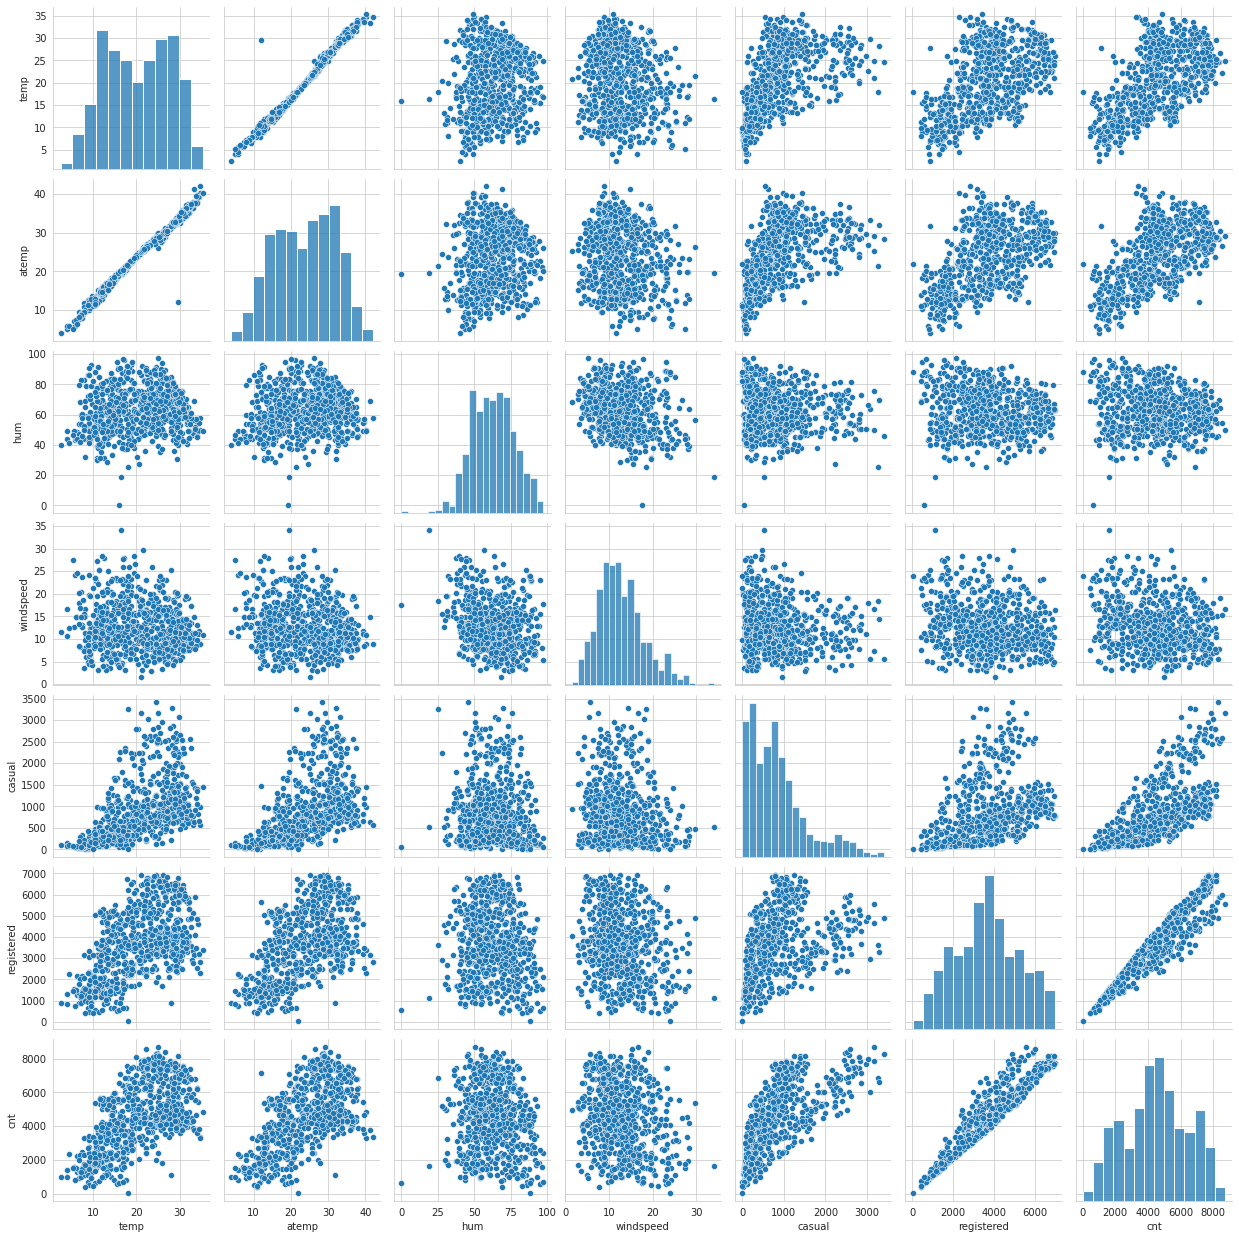

In [644]:
sns.pairplot(df, vars = ['temp','atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'])
plt.show()

From the above plots we can say that column "temp" and "atemp" are highly correlated. The same correlated can be seen between "registered" and "cnt".

From the scatter plots it is observed that the outliers are present in the dataset.

## Outlier Detection

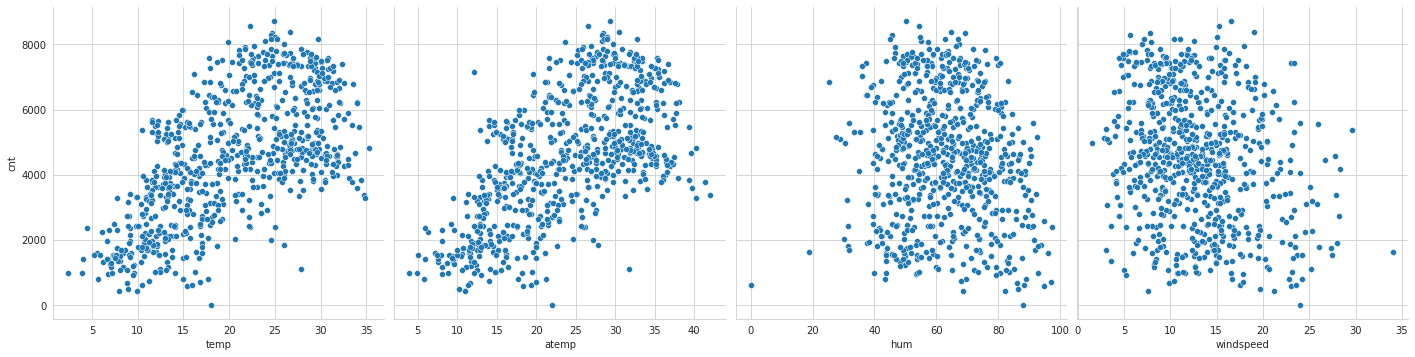

In [645]:
sns.set_style("whitegrid")
sns.pairplot(data=df,x_vars=['temp','atemp','hum','windspeed'],y_vars='cnt',kind='scatter',height=5,aspect=1);

* Outlier is detected in hum vs count plot for humidity between 0 and 20.
* Outlier present 30-35 in windspeed vs count plot.

#### Droppinng the Outlier

In [646]:
#outliers in hum
df = df.drop(index = df[(df['hum'] < 20)].index)

#outliers in windspeed
df = df.drop(index = df[(df['windspeed'] > 30)].index)

In [647]:
df = df.drop(['temp','registered'],axis=1)

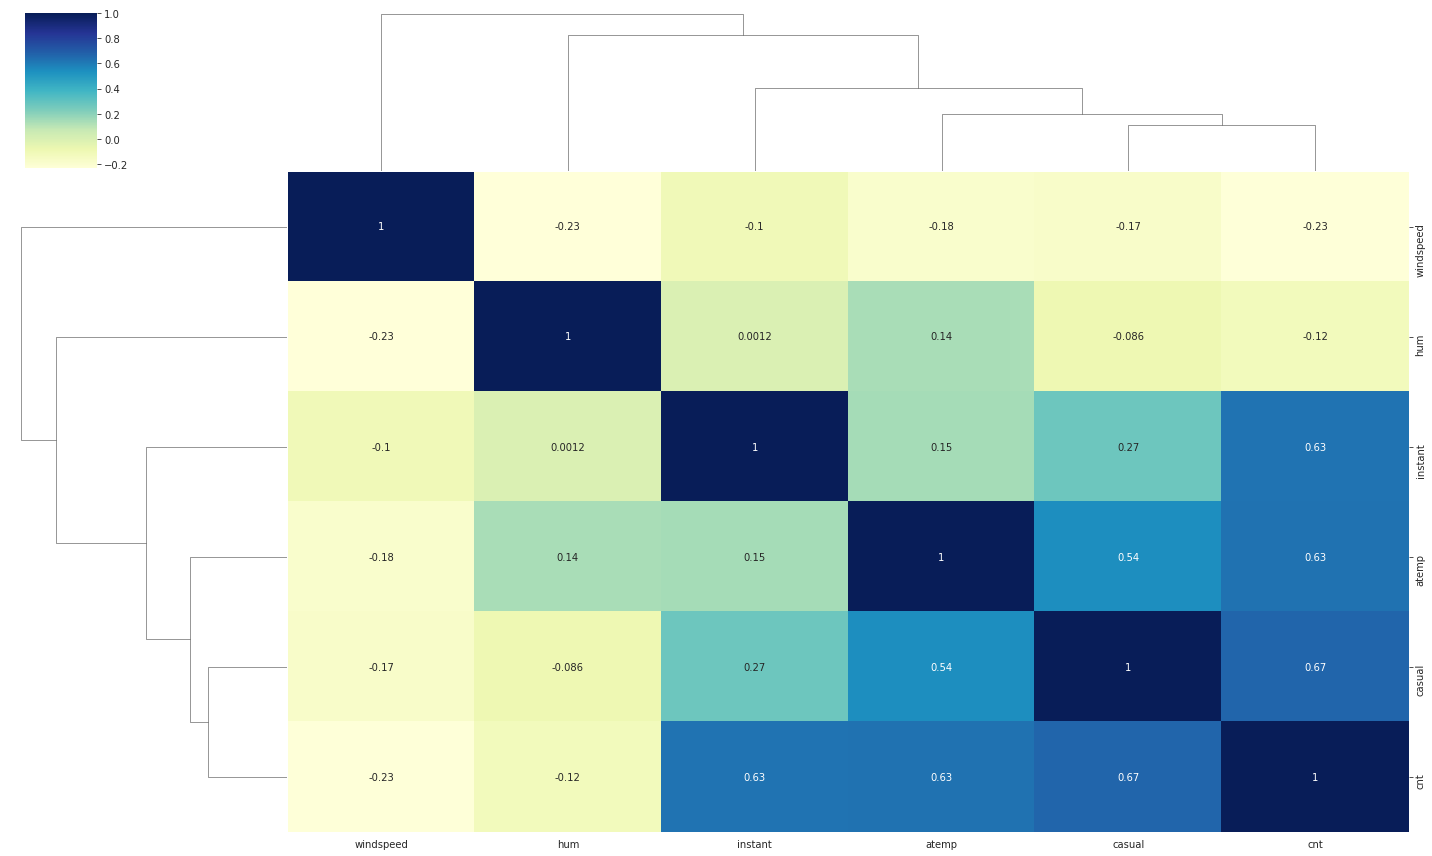

In [648]:
sns.set_style("whitegrid")
sns.clustermap(data=df.corr(), cmap='YlGnBu', figsize=(20,12), annot=True)
plt.show()

From the heatmap, I can observe that: we can drop casual and instant as they are highly co related

In [649]:
df = df.drop(['instant','casual'],axis=1)

### Visualising Categorical Variables

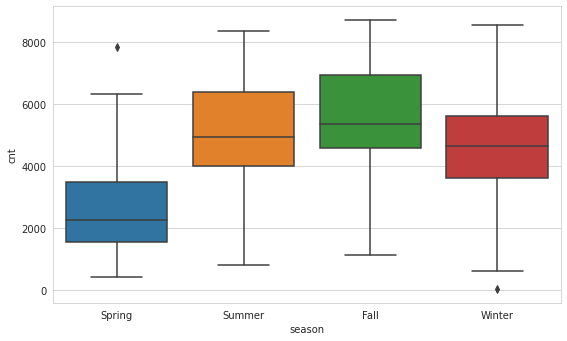

In [650]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.show()

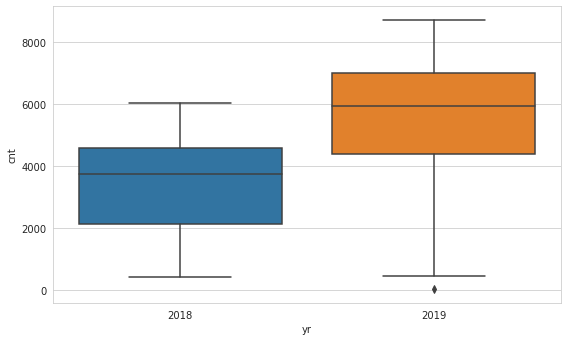

In [651]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.show()

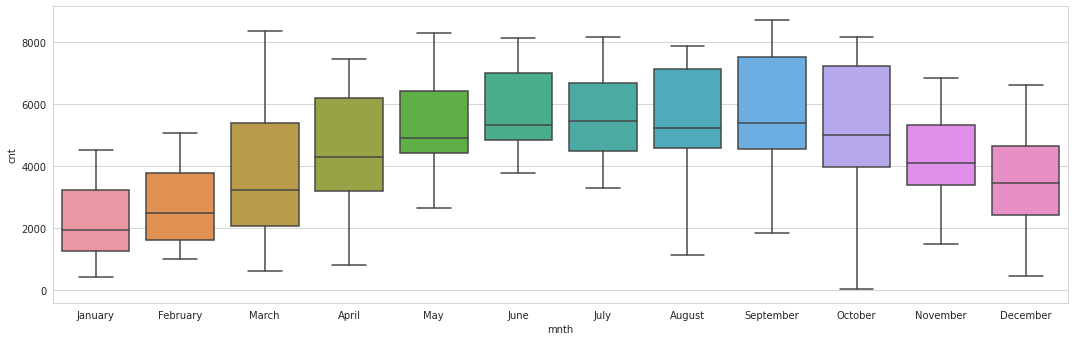

In [652]:
plt.figure(figsize=(40, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.show()

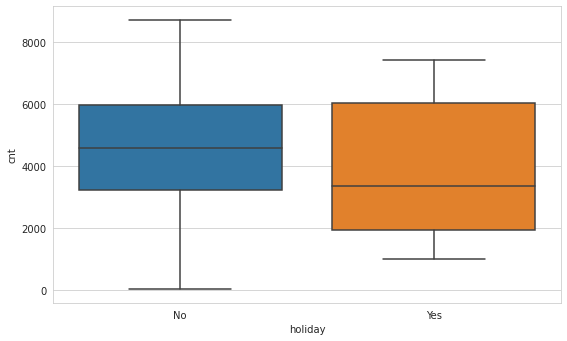

In [653]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.show()

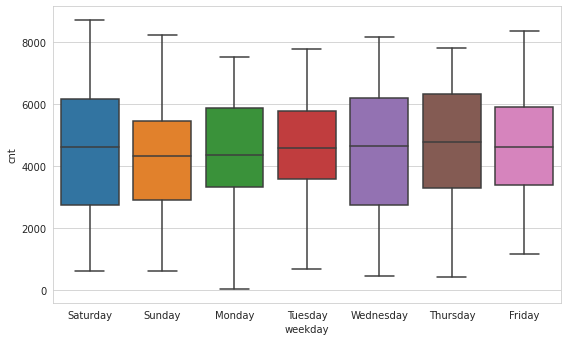

In [654]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.show()

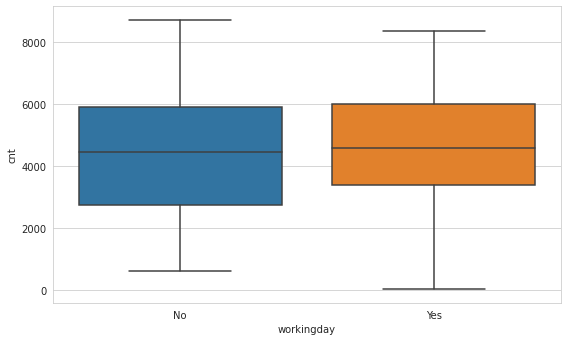

In [655]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.show()

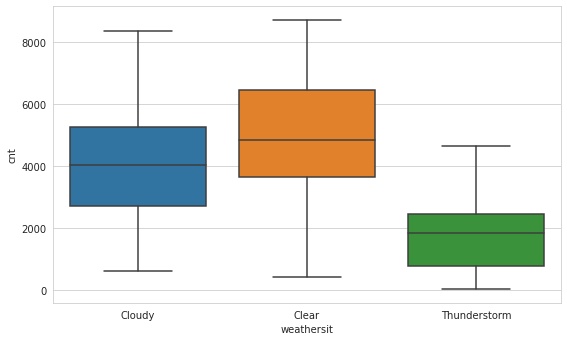

In [656]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.show()

Observations: 


*   The demand for bikes are less if the season is spring.
*   The demand were high in 2019 as compared to 2018
*   The demand is highest in the month of October.
*   The demand is less when there is thunderstom and high when the situation is clear. 
*   On Saturday and wednesday the demands are higher compare to other days.
*   Majority of bikes rented on holidays or not working day.



## Step 3: Data Preparation

Creating the dummy variables for the categorical feature.

In [657]:
func = lambda x: x.map({'No': 0, 'Yes': 1})


df[['holiday']] = df[['holiday']].apply(func)
df[['workingday']] = df[['workingday']].apply(func)


func = lambda x: x.map({'2018': 0, '2019': 1})

df[['yr']] = df[['yr']].apply(func)

In [658]:
Status_weekday = pd.get_dummies(df['weekday'], drop_first = True)
Status_month = pd.get_dummies(df['mnth'], drop_first = True)
Status_season = pd.get_dummies(df['season'], drop_first = True)
Status_weathersit = pd.get_dummies(df['weathersit'], drop_first = True)

In [659]:
Status_weekday.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [660]:
Status_month.head()

,August,December,February,January,July,June,March,May,November,October,September
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [661]:
Status_season.head()

,Spring,Summer,Winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [662]:
Status_weathersit.head()

,Cloudy,Thunderstorm
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [663]:
# adding the dummy variables to the datadrame
df = pd.concat([df, Status_weathersit, Status_season,Status_month, Status_weekday], axis = 1)

In [664]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,...,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,Spring,0,January,0,Saturday,0,Cloudy,18.18125,80.5833,10.749882,...,0,0,0,0,0,1,0,0,0,0
1,Spring,0,January,0,Sunday,0,Cloudy,17.68695,69.6087,16.652113,...,0,0,0,0,0,0,1,0,0,0
2,Spring,0,January,0,Monday,1,Clear,9.47025,43.7273,16.636703,...,0,0,0,0,1,0,0,0,0,0
3,Spring,0,January,0,Tuesday,1,Clear,10.60610,59.0435,10.739832,...,0,0,0,0,0,0,0,0,1,0
4,Spring,0,January,0,Wednesday,1,Clear,11.46350,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,1


In [665]:
# Dropping the categorical features after creating the dummy variables of their option values.
df = df.drop(['season','mnth','weekday','weathersit'], axis = 1)

In [666]:
df.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Cloudy,Thunderstorm,Spring,...,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,1,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,9.47025,43.7273,16.636703,1349,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,11.46350,43.6957,12.522300,1600,0,0,1,...,0,0,0,0,0,0,0,0,0,1


## Step 4: Splitting the Data into Training and Testing Sets

In [667]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [668]:
#Rescaling the features between 0 and 1. therefore using minmaxScaler.
scaler = MinMaxScaler()

In [669]:
num_vars = ['atemp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [670]:
df_train

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Cloudy,Thunderstorm,Spring,...,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
728,1,0,0,0.204242,0.319025,0.772556,0.204096,0,0,1,...,0,0,0,0,0,0,1,0,0,0
481,1,0,1,0.499889,0.204176,0.764739,0.714565,0,0,0,...,0,0,0,0,0,0,0,0,0,0
113,0,0,0,0.632534,0.774941,0.375373,0.479636,1,0,0,...,0,0,0,0,0,0,1,0,0,0
629,1,0,0,0.711117,0.546404,0.604317,0.963300,0,0,0,...,0,0,0,1,0,1,0,0,0,0
535,1,0,1,0.858965,0.470417,0.179101,0.712034,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,1,0,0,0.899500,0.499999,0.538883,0.782559,0,0,0,...,0,0,0,0,0,1,0,0,0,0
54,0,0,1,0.281174,0.617017,0.521446,0.205361,1,0,1,...,0,0,0,0,0,0,0,1,0,0
352,0,0,1,0.270123,0.533642,0.327086,0.388978,0,0,0,...,0,0,0,0,1,0,0,0,0,0
81,0,0,1,0.346406,0.814940,0.480783,0.241486,1,0,0,...,0,0,0,0,0,0,0,0,0,1


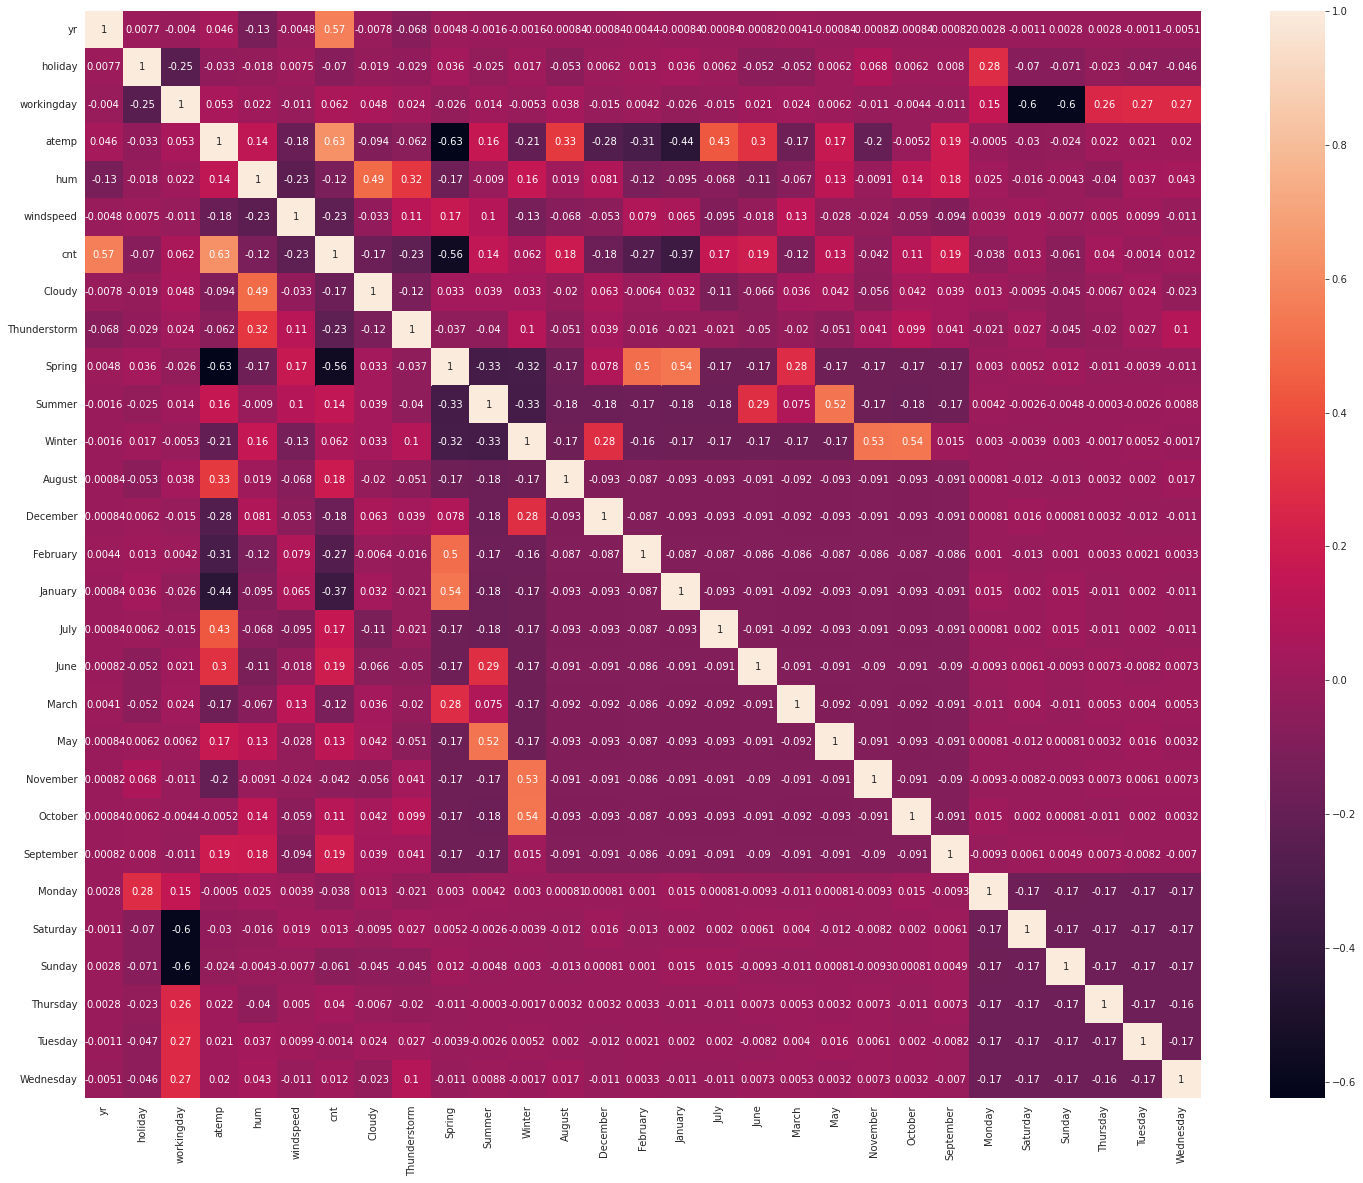

In [671]:
sns.set_style("whitegrid")
plt.figure(figsize=(25, 20))
sns.heatmap(df.corr(), annot = True)
plt.show()

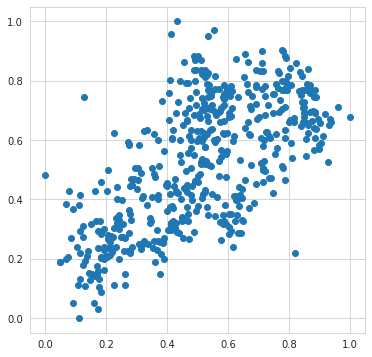

In [672]:
plt.figure(figsize=[6,6])
plt.scatter(df_train['cnt'], df_train['atemp'])
plt.show()

## Dividing into X and Y sets for the model building

In [673]:
y_train = df_train.pop('cnt')
X_train = df_train

## RFE

In [674]:
#https://machinelearningmastery.com/rfe-feature-selection-in-python/

lm =LinearRegression() 
lm.fit(X_train,y_train)
rfe =  RFE(estimator=lm, n_features_to_select=15)           
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 6),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Cloudy', True, 1),
 ('Thunderstorm', True, 1),
 ('Spring', True, 1),
 ('Summer', False, 10),
 ('Winter', True, 1),
 ('August', False, 8),
 ('December', False, 3),
 ('February', False, 12),
 ('January', False, 4),
 ('July', True, 1),
 ('June', False, 7),
 ('March', True, 1),
 ('May', True, 1),
 ('November', True, 1),
 ('October', False, 11),
 ('September', True, 1),
 ('Monday', False, 2),
 ('Saturday', False, 5),
 ('Sunday', True, 1),
 ('Thursday', False, 13),
 ('Tuesday', False, 9),
 ('Wednesday', False, 14)]

In [675]:
Col_supported = X_train.columns[rfe.support_]
Col_supported

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'Cloudy', 'Thunderstorm',
       'Spring', 'Winter', 'July', 'March', 'May', 'November', 'September',
       'Sunday'],
      dtype='object')

In [676]:
#Creating a dataframe with selected 15 features for further building the model.
X_train_rfe_col = X_train[Col_supported]

## Step 5: Building a linear model

In [677]:
print(X_train_rfe_col.shape)

(509, 15)


In [678]:
X_train_rfe_col.columns

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'Cloudy', 'Thunderstorm',
       'Spring', 'Winter', 'July', 'March', 'May', 'November', 'September',
       'Sunday'],
      dtype='object')

Since the dataset has a large number of columns, forward feature selection method will be a tedious task. Therefore in this case study I am proceeding with backward feature selection.

In [679]:
# Add a constant
X_train_lm = sm.add_constant(X_train_rfe_col)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [680]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     186.5
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          4.16e-192
Time:                        18:24:07   Log-Likelihood:                 522.60
No. Observations:                 509   AIC:                            -1013.
Df Residuals:                     493   BIC:                            -945.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3028      0.026     11.844   

### Checking VIF

In [681]:
# Taking the VIF code from Upgrad case study 
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_col.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_col.values, i) for i in range(X_train_rfe_col.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,15.05
2,atemp,11.77
4,windspeed,4.24
5,Cloudy,2.63
8,Winter,2.53
7,Spring,2.36
0,yr,2.09
12,November,1.59
9,July,1.48
6,Thunderstorm,1.47


Checking for the variable with high VIF(>5) and High p-value(>0.05) and dropping them one at a time.

Dropping "November" due to high p-value. 0.069

In [682]:
X_train_rfe_col = X_train_rfe_col.drop('November', axis =1)

In [683]:
X_train_rfe_col.columns

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'Cloudy', 'Thunderstorm',
       'Spring', 'Winter', 'July', 'March', 'May', 'September', 'Sunday'],
      dtype='object')

In [684]:
# Add a constant
X_train_lm = sm.add_constant(X_train_rfe_col)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     198.7
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          1.50e-192
Time:                        18:24:07   Log-Likelihood:                 520.89
No. Observations:                 509   AIC:                            -1012.
Df Residuals:                     494   BIC:                            -948.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2964      0.025     11.678   

In [685]:
# Taking the VIF code from Upgrad case study 
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_col.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_col.values, i) for i in range(X_train_rfe_col.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,15.04
2,atemp,11.72
4,windspeed,4.20
5,Cloudy,2.61
7,Spring,2.36
0,yr,2.09
8,Winter,1.98
9,July,1.48
6,Thunderstorm,1.47
11,May,1.38


Dropping "hum" because of high VIF 29.98.

In [686]:
X_train_rfe_col = X_train_rfe_col.drop('hum', axis =1)

In [687]:
# Add a constant
X_train_lm = sm.add_constant(X_train_rfe_col)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     201.3
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          5.06e-188
Time:                        18:24:07   Log-Likelihood:                 507.34
No. Observations:                 509   AIC:                            -986.7
Df Residuals:                     495   BIC:                            -927.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2431      0.024     10.205   

In [688]:
# Taking the VIF code from Upgrad case study 
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_col.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_col.values, i) for i in range(X_train_rfe_col.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,5.26
3,windspeed,4.16
0,yr,2.06
6,Spring,1.82
4,Cloudy,1.59
7,Winter,1.50
8,July,1.44
10,May,1.32
11,September,1.25
9,March,1.22


Dropping "May" because of high p-value 0.127.

In [689]:
X_train_rfe_col = X_train_rfe_col.drop('May', axis =1)

In [690]:
# Add a constant
X_train_lm = sm.add_constant(X_train_rfe_col)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.3
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          1.08e-188
Time:                        18:24:07   Log-Likelihood:                 506.13
No. Observations:                 509   AIC:                            -986.3
Df Residuals:                     496   BIC:                            -931.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2478      0.024     10.472   

In [691]:
# Taking the VIF code from Upgrad case study 
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_col.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_col.values, i) for i in range(X_train_rfe_col.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,4.82
3,windspeed,4.15
0,yr,2.06
6,Spring,1.77
4,Cloudy,1.57
7,Winter,1.41
8,July,1.36
9,March,1.21
10,September,1.20
11,Sunday,1.18


Above model is the final model build for linear regression.

In [692]:
cols = X_train_rfe_col.columns
cols

Index(['yr', 'holiday', 'atemp', 'windspeed', 'Cloudy', 'Thunderstorm',
       'Spring', 'Winter', 'July', 'March', 'September', 'Sunday'],
      dtype='object')

## Step 7: Residual Analysis of the train data

In [693]:
#X_train2= X_train2.reshape(-1,1)
y_pred = lr.predict(X_train_lm)

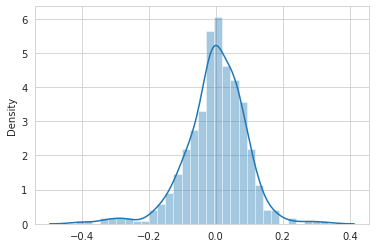

In [694]:
# Calculating the residual and ploting them to see whether the residual values follow the normal distribution.
res = y_train - y_pred

sns.distplot(res)

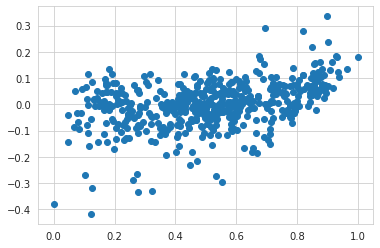

In [695]:
plt.scatter(y_train,res)
plt.show()

## Making Predictions Using the Final Model

In [696]:
# Scaling the numerical feature for test dataset.
num_vars = ['atemp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

### Dividing into X and Y sets for the model building

In [697]:
y_test = df_test.pop('cnt')
X_test = df_test

In [698]:
X_test_rfe_col = X_test[cols]

In [699]:
# dropping the features which are not in the final build model.
#X_test_rfe_col = X_test_rfe_col.drop(['holiday','hum'], axis=1)

In [700]:
X_test_rfe_col.columns

Index(['yr', 'holiday', 'atemp', 'windspeed', 'Cloudy', 'Thunderstorm',
       'Spring', 'Winter', 'July', 'March', 'September', 'Sunday'],
      dtype='object')

In [701]:
# Add a constant
X_test_lm = sm.add_constant(X_test_rfe_col)

# predecting 
y_test_pred = lr.predict(X_test_lm)

## Model Evaluation

Text(0, 0.5, 'y_test_pred')

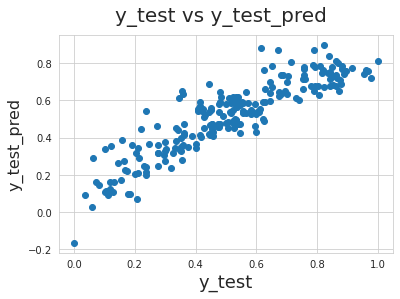

In [702]:
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20) 
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_test_pred', fontsize=16)

#### R2 error calculation

In [703]:
R2_error = r2_score(y_test, y_test_pred)
print(R2_error)

0.7969200080364318


### Adjusted R2 Calculation

In [704]:
y_test.shape[0]

219

In [705]:
X_test_rfe_col.shape[1]

12

In [706]:
Adj_R2_error = 1 - (((1-(R2_error*R2_error))*(y_test.shape[0]-1))/(y_test.shape[0]-X_test_rfe_col.shape[1]-1))
print(Adj_R2_error)

0.6138241108131819


### R2 Score

The R2-error for the train dataset is 0.840 whereas for test set is 0.797. 



### Adjacent R Square

The adjacent R square for train dataset is 0.836 and for test dataset is 0.614.

### The final Equation of line

cnt = 0.2309yr- 0.0699holiday 0.4665atemp -0.0844windspeed -0.2911Thunderstom -0.0806Cloudy -0.1299Spring +0.0350Winter +0.0436March -0.0543July + 0.0685September -0.0415*Sunday + 0.2478

•	The demand of the bike increases by 23.09% in 2019.
•	Feeling temperature plays a key role in the bike count and it increase the demand by 46.65%
•	weather situations which includes Light Snow, Light Rain + Thunderstorm + Scattered clouds,Light Rain + Scattered clouds decreases the bike counts by 29.11%. Similarly, cloudy weather like Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist decreases the count by 8.06%.
•	Windspeed also decreases the demand by 8.44%.
•	Season like Spring decrease the demand by 12.99% whereas winter season increase the bike count by 3.5%.
•	Month also depend on bike demand, it is evident from the equation that March  and September the count increases by 4.36% and 6.85%  whereas the demand decreases in July.
•	The demand of the bike decrease approximately by 4% on Sunday.
•	The demand decreases on Holidays by around 7%.
